In [1]:
import modeller
import fitter

import casadi as ca
from scipy.integrate import solve_ivp
import numpy as np
from matplotlib import pyplot as plt

In [2]:
p_true = [1, 3]
tspan = [0, 20]
def system(t, y, p):
    return [
        p[0]*y[1]*(p[1]-y[0]),
        -p[0]*y[0]
    ]
sol = solve_ivp(lambda t, y: system(t, y, p_true), tspan, [0.5, 0.5], dense_output=True)

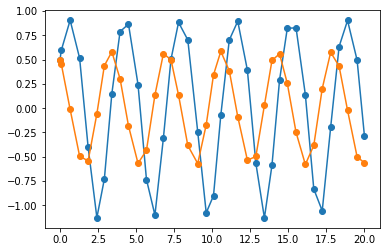

In [3]:
plt.plot(sol.t, sol.y.T, 'o-')

In [4]:
neat_ts = np.linspace(*tspan, 15)
raw_data = sol.sol(neat_ts)[0]
data = raw_data + np.random.randn(15)*0.175
data.shape

(15,)

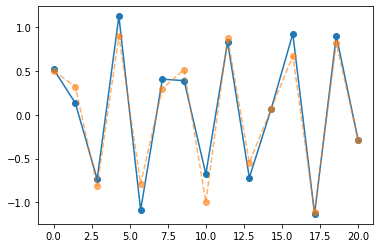

In [5]:
plt.plot(neat_ts, data.T, 'o-')
plt.plot(neat_ts, raw_data.T, 'o--', alpha=0.6)

In [6]:
data_pd = np.array([[i] for i in list(data.flatten())])
# data_pd = np.array([list(i) for i in data.T])
config = {
    "grid_size": 100,
    "basis_number": 40,
    "model_form": {
        "state": 2,
        "parameters": 2
    },
    "time_span": tspan,
    "knot_function": None,
    "model": system,
    "dataset": {"y": data_pd, "t": neat_ts},
    "observation_vector": [0],
    "weightings":[
        [1]*2,
        [1]*len(neat_ts)
    ],
    "regularisation_value": [0, 0],
}

In [7]:
model = modeller.Model(config)
objective = fitter.Objective()
objective.make(config, config['dataset'], model)

solver_setup = {
    'f': objective.objective,
    'x': ca.vcat(objective.input_list),
    'p': ca.hcat([objective.rho, objective.alpha])
}

solver = ca.nlpsol('solver', 'ipopt', solver_setup)

In [8]:
p0 = [0.5, 1]
c0 = np.ones(config['basis_number']*2)
x0 = np.hstack([*c0, p0])
lbx = [-np.inf]*(config['basis_number']*2) + [0]*len(config['regularisation_value'])

In [9]:
prange = np.logspace(-6, 6, num=200)
solutions = []
xguess = x0
for p in prange:
    solutions.append(solver(x0=xguess, p=[p, (np.log10(p)+6)*1e-4], lbx=lbx))
#     solutions.append(solver(x0=xguess, p=[p, 0], lbx=lbx))
    xguess = np.array(solutions[-1]['x']).flatten()
#     xguess += np.random.randn()*np.mean(xguess)/40


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     3403

Total number of variables............................:       82
                     variables with only lower bounds:        2
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equa

   5  1.5276746e-06 0.00e+00 1.74e-07  -8.6 1.57e-02  -5.0 1.00e+00 1.00e+00f  1
   6  1.5253667e-06 0.00e+00 2.17e-08  -8.6 5.85e-03  -5.4 1.00e+00 1.00e+00f  1
   7  1.5234076e-06 0.00e+00 7.46e-09  -9.0 6.04e-03  -5.9 1.00e+00 1.00e+00f  1

Number of Iterations....: 7

                                   (scaled)                 (unscaled)
Objective...............:   1.5234075810706025e-06    1.5234075810706025e-06
Dual infeasibility......:   7.4634994663651827e-09    7.4634994663651827e-09
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   1.1609902523332542e-09    1.1609902523332542e-09
Overall NLP error.......:   7.4634994663651827e-09    7.4634994663651827e-09


Number of objective function evaluations             = 8
Number of objective gradient evaluations             = 8
Number of equality constraint evaluations            = 0
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

  13  4.2663292e-06 0.00e+00 1.53e-04  -5.7 4.81e-01  -7.2 1.00e+00 1.00e+00f  1
  14  4.1391183e-06 0.00e+00 6.02e-06  -5.7 1.60e-01  -7.7 1.00e+00 1.00e+00f  1
  15  2.7893360e-06 0.00e+00 6.11e-06  -8.6 2.00e-01  -8.2 1.00e+00 1.00e+00f  1
  16  2.4247974e-06 0.00e+00 5.84e-06  -8.6 5.07e-02  -8.7 1.00e+00 1.00e+00f  1
  17  2.3350384e-06 0.00e+00 3.52e-07  -8.6 2.42e-02  -9.2 1.00e+00 1.00e+00f  1
  18  2.3128328e-06 0.00e+00 1.05e-07  -8.6 1.05e-02  -9.6 1.00e+00 1.00e+00f  1
  19  2.3073372e-06 0.00e+00 3.67e-08  -8.6 4.41e-03 -10.1 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  2.3062138e-06 0.00e+00 3.38e-09  -8.6 1.83e-03 -10.6 1.00e+00 1.00e+00f  1

Number of Iterations....: 20

                                   (scaled)                 (unscaled)
Objective...............:   2.3062137661175930e-06    2.3062137661175930e-06
Dual infeasibility......:   3.3756899606743286e-09    3.3756899606743286e-09
Constraint viol

   1  9.5019191e-02 0.00e+00 3.56e-01  -1.0 8.28e+00  -4.0 6.43e-01 6.25e-02f  5
   2  9.3452513e-02 0.00e+00 3.05e-01  -1.7 9.19e+00  -4.5 9.85e-01 2.50e-01f  3
   3  1.0484969e-01 0.00e+00 1.49e+00  -1.7 9.84e+00  -5.0 9.02e-01 2.50e-01f  3
   4  6.7577490e-02 0.00e+00 1.19e+00  -1.7 1.58e+02  -5.4 2.67e-02 6.43e-03f  2
   5  5.2948766e-02 0.00e+00 8.82e-01  -1.7 1.96e+01  -2.3 7.98e-02 1.77e-02f  2
   6  2.4438577e-02 0.00e+00 1.78e-02  -1.7 1.02e-01  -1.0 1.00e+00 1.00e+00f  1
   7  6.5948360e-03 0.00e+00 8.90e-03  -3.8 9.03e-02  -1.4 1.00e+00 1.00e+00f  1
   8  1.8059196e-03 0.00e+00 2.45e-03  -3.8 7.05e-02  -1.9 1.00e+00 1.00e+00f  1
   9  5.8442147e-04 0.00e+00 3.94e-03  -3.8 5.20e-02  -2.4 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  2.8159906e-04 0.00e+00 5.25e-03  -3.8 8.18e-02  -2.9 1.00e+00 1.00e+00f  1
  11  1.9846498e-04 0.00e+00 3.56e-03  -3.8 1.61e-01  -3.4 1.00e+00 1.00e+00f  1
  12  1.7093375e-04 0.00e+00

  21  7.1107162e-06 0.00e+00 1.76e-06  -5.7 2.24e-02  -9.0 1.00e+00 1.00e+00f  1
  22  5.7470098e-06 0.00e+00 4.04e-06  -8.6 9.38e-02  -9.5 1.00e+00 1.00e+00f  1
  23  5.3963710e-06 0.00e+00 6.30e-06  -8.6 3.00e-02 -10.0 1.00e+00 1.00e+00f  1
  24  5.3107396e-06 0.00e+00 6.06e-07  -8.6 1.45e-02 -10.5 1.00e+00 1.00e+00f  1
  25  5.2899670e-06 0.00e+00 4.32e-07  -8.6 6.91e-03 -10.9 1.00e+00 1.00e+00f  1
  26  5.2850580e-06 0.00e+00 1.02e-07  -8.6 5.56e-03 -11.4 1.00e+00 1.00e+00f  1
  27  5.2840998e-06 0.00e+00 8.15e-09  -8.6 1.66e-02 -11.9 1.00e+00 1.00e+00f  1

Number of Iterations....: 27

                                   (scaled)                 (unscaled)
Objective...............:   5.2840998399398329e-06    5.2840998399398329e-06
Dual infeasibility......:   8.1547546875435951e-09    8.1547546875435951e-09
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5970795859054571e-09    2.5970795859054571e-09
Overall NLP error......

   2  3.2375635e-05 0.00e+00 2.57e-03  -3.8 2.47e+02    -  7.46e-01 5.00e-01f  2
   3  1.3467452e-04 0.00e+00 1.41e-03  -3.8 1.49e-01  -4.0 1.00e+00 5.00e-01f  2
   4  5.7916099e-05 0.00e+00 3.14e-05  -5.7 9.51e-02  -4.5 1.00e+00 1.00e+00f  1
   5  2.3316887e-05 0.00e+00 1.43e-05  -5.7 6.69e-02  -5.0 1.00e+00 1.00e+00f  1
   6  1.4495318e-05 0.00e+00 2.35e-05  -5.7 1.77e-01  -5.4 1.00e+00 1.00e+00f  1
   7  1.1750055e-05 0.00e+00 1.68e-05  -5.7 2.83e-01  -5.9 1.00e+00 1.00e+00f  1
   8  9.8010449e-06 0.00e+00 9.77e-06  -8.6 2.00e-01  -6.4 1.00e+00 1.00e+00f  1
   9  9.3213097e-06 0.00e+00 1.57e-06  -8.6 8.63e-02  -6.9 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  9.2147806e-06 0.00e+00 7.37e-08  -8.6 1.54e-02  -7.3 1.00e+00 1.00e+00f  1
  11  9.1896991e-06 0.00e+00 9.43e-09  -8.6 5.89e-03  -7.8 1.00e+00 1.00e+00f  1
  12  9.1829978e-06 0.00e+00 4.14e-09  -9.0 3.11e-03  -8.3 1.00e+00 1.00e+00f  1

Number of Iterations....: 1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  3.0698242e-04 0.00e+00 5.93e-03  -3.8 6.13e-01  -4.7 1.00e+00 1.00e+00f  1
  11  2.2697619e-04 0.00e+00 5.44e-03  -3.8 1.10e+00  -5.2 1.00e+00 1.00e+00f  1
  12  1.6799281e-04 0.00e+00 9.30e-03  -3.8 1.19e+00  -5.6 1.00e+00 1.00e+00f  1
  13  1.4697877e-04 0.00e+00 1.86e-03  -3.8 4.62e-01  -6.1 1.00e+00 1.00e+00f  1
  14  1.4353867e-04 0.00e+00 1.27e-04  -3.8 1.28e-01  -6.6 1.00e+00 1.00e+00f  1
  15  5.8929500e-05 0.00e+00 7.25e-03  -5.7 7.46e-01  -7.1 1.00e+00 1.00e+00f  1
  16  2.7877456e-05 0.00e+00 2.48e-03  -5.7 5.97e-01  -7.5 1.00e+00 1.00e+00f  1
  17  1.9806500e-05 0.00e+00 9.20e-04  -5.7 1.59e-01  -8.0 1.00e+00 1.00e+00f  1
  18  1.8030318e-05 0.00e+00 9.35e-05  -5.7 5.85e-02  -8.5 1.00e+00 1.00e+00f  1
  19  1.7818926e-05 0.00e+00 1.74e-06  -5.7 2.01e-02  -9.0 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  1.6432222e-05 0.00e+00

  12  1.5603345e-04 0.00e+00 4.51e-03  -3.8 4.70e-01  -6.5 1.00e+00 1.00e+00f  1
  13  1.5216867e-04 0.00e+00 1.39e-05  -3.8 4.60e-02  -7.0 1.00e+00 1.00e+00f  1
  14  6.5958002e-05 0.00e+00 7.14e-03  -5.7 7.22e-01  -7.5 1.00e+00 1.00e+00f  1
  15  3.6156615e-05 0.00e+00 3.57e-03  -5.7 4.37e-01  -8.0 1.00e+00 1.00e+00f  1
  16  2.8007980e-05 0.00e+00 1.28e-03  -5.7 1.28e-01  -8.4 1.00e+00 1.00e+00f  1
  17  2.6210558e-05 0.00e+00 1.09e-04  -5.7 3.47e-02  -8.9 1.00e+00 1.00e+00f  1
  18  2.5999495e-05 0.00e+00 1.81e-06  -5.7 5.39e-02  -9.4 1.00e+00 1.00e+00f  1
  19  2.4609217e-05 0.00e+00 3.35e-05  -8.6 4.14e-02  -9.9 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  2.4248491e-05 0.00e+00 3.62e-06  -8.6 2.15e-02 -10.4 1.00e+00 1.00e+00f  1
  21  2.4157515e-05 0.00e+00 1.42e-06  -8.6 1.05e-02 -10.8 1.00e+00 1.00e+00f  1
  22  2.4134032e-05 0.00e+00 5.78e-07  -8.6 5.96e-03 -11.3 1.00e+00 1.00e+00f  1
  23  2.4128013e-05 0.00e+00

   4  3.1212485e-03 0.00e+00 1.80e+00  -1.7 2.36e+00  -1.8 4.74e-01 3.30e-01f  1
   5  5.3794270e-03 0.00e+00 6.02e+00  -1.7 2.57e+05    -  6.69e-02 3.12e-02f  6
   6  1.1192045e-02 0.00e+00 2.30e+01  -1.7 2.61e+00  -2.3 1.00e+00 5.00e-01f  2
   7  1.1301997e-02 0.00e+00 1.63e-02  -1.7 5.71e-02  -2.8 1.00e+00 1.00e+00f  1
   8  3.6696952e-03 0.00e+00 1.26e-01  -3.8 1.27e-01  -3.3 1.00e+00 1.00e+00f  1
   9  1.6530507e-03 0.00e+00 4.89e-01  -3.8 3.18e-01  -3.7 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  8.4376133e-04 0.00e+00 2.45e-01  -3.8 5.28e-01  -4.2 1.00e+00 1.00e+00f  1
  11  4.5945350e-04 0.00e+00 1.16e-01  -3.8 7.78e-01  -4.7 1.00e+00 1.00e+00f  1
  12  2.5993015e-04 0.00e+00 5.05e-02  -3.8 1.31e+00  -5.2 1.00e+00 1.00e+00f  1
  13  1.8625335e-04 0.00e+00 5.13e-02  -3.8 1.08e+00  -5.6 1.00e+00 1.00e+00f  1
  14  1.6194150e-04 0.00e+00 4.21e-03  -3.8 3.70e-01  -6.1 1.00e+00 1.00e+00f  1
  15  1.6007405e-04 0.00e+00

  49  3.6471861e-05 0.00e+00 2.31e-07  -9.0 1.10e+00    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  50  3.6471804e-05 0.00e+00 6.22e-08  -9.0 1.26e+00    -  1.00e+00 1.00e+00f  1
  51  3.6471746e-05 0.00e+00 6.34e-09  -9.0 3.91e-01    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 51

                                   (scaled)                 (unscaled)
Objective...............:   3.6471745640232321e-05    3.6471745640232321e-05
Dual infeasibility......:   6.3400790131158399e-09    6.3400790131158399e-09
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   9.0909090869567703e-10    9.0909090869567703e-10
Overall NLP error.......:   6.3400790131158399e-09    6.3400790131158399e-09


Number of objective function evaluations             = 111
Number of objective gradient evaluations             = 52
Number of equality constraint evaluations            = 0
Number of ine

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  4.0038014e-04 0.00e+00 1.71e-02  -3.8 3.80e-01  -3.1 1.00e+00 1.00e+00f  1
  11  2.9142271e-04 0.00e+00 7.81e-03  -3.8 3.20e-01  -3.6 1.00e+00 1.00e+00f  1
  12  2.6072738e-04 0.00e+00 2.49e-04  -3.8 1.93e-01  -4.1 1.00e+00 1.00e+00f  1
  13  1.4873574e-04 0.00e+00 6.56e-03  -5.7 3.63e-01  -4.5 1.00e+00 1.00e+00f  1
  14  8.4883639e-05 0.00e+00 2.92e-03  -5.7 5.82e-01  -5.0 1.00e+00 1.00e+00f  1
  15  6.1220468e-05 0.00e+00 1.08e-03  -5.7 5.97e-01  -5.5 1.00e+00 1.00e+00f  1
  16  5.7186464e-05 0.00e+00 1.63e-04  -5.7 3.25e-01  -6.0 1.00e+00 1.00e+00f  1
  17  5.6913543e-05 0.00e+00 3.92e-06  -5.7 6.84e-02  -6.4 1.00e+00 1.00e+00f  1
  18  5.5560402e-05 0.00e+00 1.78e-05  -8.6 3.57e-02  -6.9 1.00e+00 1.00e+00f  1
  19  5.5220907e-05 0.00e+00 3.81e-07  -8.6 1.83e-02  -7.4 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  5.5139870e-05 0.00e+00

   3  3.5451140e-02 0.00e+00 2.61e-01  -1.7 7.45e-01  -1.3 8.72e-01 5.05e-01f  1
   4  3.7687348e-02 0.00e+00 2.89e+00  -1.7 4.58e+05    -  7.46e-03 7.81e-03f  8
   5  3.2179842e-02 0.00e+00 6.38e+00  -1.7 1.05e+00  -1.8 1.00e+00 1.00e+00f  1
   6  2.1021263e-02 0.00e+00 7.88e-01  -1.7 3.09e-01  -2.3 1.00e+00 1.00e+00f  1
   7  1.1163251e-02 0.00e+00 5.14e-02  -1.7 2.47e-01  -2.8 1.00e+00 1.00e+00f  1
   8  3.9463349e-03 0.00e+00 3.10e-02  -2.5 1.11e-01  -3.3 1.00e+00 1.00e+00f  1
   9  2.3148744e-03 0.00e+00 2.92e-02  -2.5 2.44e-01  -3.7 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  2.0354337e-03 0.00e+00 4.39e-02  -2.5 4.76e-01  -4.2 1.00e+00 1.00e+00f  1
  11  1.9936940e-03 0.00e+00 1.66e-02  -2.5 3.43e-01  -4.7 1.00e+00 1.00e+00f  1
  12  8.2086540e-04 0.00e+00 1.41e-01  -3.8 7.01e-01  -5.2 1.00e+00 1.00e+00f  1
  13  3.5377591e-04 0.00e+00 8.34e-02  -3.8 8.93e-01  -5.6 1.00e+00 1.00e+00f  1
  14  2.1514968e-04 0.00e+00

  22  9.5631824e-05 0.00e+00 7.80e-07  -8.6 1.79e-02  -9.3 1.00e+00 1.00e+00f  1
  23  9.5536924e-05 0.00e+00 4.19e-06  -8.6 8.77e-03  -9.8 1.00e+00 1.00e+00f  1
  24  9.5511647e-05 0.00e+00 1.39e-06  -8.6 4.19e-03 -10.3 1.00e+00 1.00e+00f  1
  25  9.5505123e-05 0.00e+00 2.51e-07  -8.6 1.77e-03 -10.7 1.00e+00 1.00e+00f  1
  26  9.5503948e-05 0.00e+00 1.36e-08  -8.6 3.60e-03 -11.2 1.00e+00 1.00e+00f  1
  27  9.5501924e-05 0.00e+00 5.43e-08  -9.0 3.87e-03 -11.7 1.00e+00 1.00e+00f  1
  28  9.5501671e-05 0.00e+00 1.13e-09  -9.0 1.16e-02 -12.2 1.00e+00 1.00e+00f  1

Number of Iterations....: 28

                                   (scaled)                 (unscaled)
Objective...............:   9.5501671457564686e-05    9.5501671457564686e-05
Dual infeasibility......:   1.1295740163543011e-09    1.1295740163543011e-09
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   9.2498748973081497e-10    9.2498748973081497e-10
Overall NLP error......

   8  1.8902537e-03 0.00e+00 5.23e-03  -2.5 4.94e-02  -2.6 1.00e+00 1.00e+00f  1
   9  8.1468181e-04 0.00e+00 1.87e-01  -3.8 1.22e-01  -3.1 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  4.4434166e-04 0.00e+00 2.05e-01  -3.8 2.80e-01  -3.6 1.00e+00 1.00e+00f  1
  11  3.1364036e-04 0.00e+00 1.80e-02  -3.8 1.05e-01  -4.1 1.00e+00 1.00e+00f  1
  12  2.8330342e-04 0.00e+00 1.31e-03  -3.8 1.95e-01  -4.5 1.00e+00 1.00e+00f  1
  13  1.8949209e-04 0.00e+00 2.85e-02  -5.7 2.80e-01  -5.0 1.00e+00 1.00e+00f  1
  14  1.5632323e-04 0.00e+00 1.41e-02  -5.7 1.61e-01  -5.5 1.00e+00 1.00e+00f  1
  15  1.4793941e-04 0.00e+00 2.75e-03  -5.7 7.56e-02  -6.0 1.00e+00 1.00e+00f  1
  16  1.4624473e-04 0.00e+00 1.81e-04  -5.7 2.42e-02  -6.4 1.00e+00 1.00e+00f  1
  17  1.4604227e-04 0.00e+00 2.58e-06  -5.7 3.32e-03  -6.9 1.00e+00 1.00e+00f  1
  18  1.4462392e-04 0.00e+00 1.23e-04  -8.6 3.36e-02  -7.4 1.00e+00 1.00e+00f  1
  19  1.4425172e-04 0.00e+00

  10  3.3952523e-04 0.00e+00 1.28e-03  -3.8 4.65e-02  -4.3 1.00e+00 1.00e+00f  1
  11  2.6167139e-04 0.00e+00 5.30e-02  -5.7 1.53e-01  -4.8 1.00e+00 1.00e+00f  1
  12  2.3001042e-04 0.00e+00 2.37e-02  -5.7 1.37e-01  -5.2 1.00e+00 1.00e+00f  1
  13  2.2116181e-04 0.00e+00 4.07e-03  -5.7 7.57e-02  -5.7 1.00e+00 1.00e+00f  1
  14  2.1945713e-04 0.00e+00 2.15e-04  -5.7 2.37e-02  -6.2 1.00e+00 1.00e+00f  1
  15  2.1926378e-04 0.00e+00 2.69e-06  -5.7 3.14e-03  -6.7 1.00e+00 1.00e+00f  1
  16  2.1783473e-04 0.00e+00 1.45e-04  -8.6 3.25e-02  -7.2 1.00e+00 1.00e+00f  1
  17  2.1745773e-04 0.00e+00 3.40e-06  -8.6 1.66e-02  -7.6 1.00e+00 1.00e+00f  1
  18  2.1735864e-04 0.00e+00 6.48e-06  -8.6 8.12e-03  -8.1 1.00e+00 1.00e+00f  1
  19  2.1733178e-04 0.00e+00 1.92e-06  -8.6 3.87e-03  -8.6 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  2.1732517e-04 0.00e+00 2.86e-07  -8.6 1.63e-03  -9.1 1.00e+00 1.00e+00f  1
  21  2.1732420e-04 0.00e+00

   1  3.5076583e-02 0.00e+00 5.02e-01  -1.0 9.85e-02   0.0 1.00e+00 1.00e+00f  1
   2  1.4474549e-02 0.00e+00 5.50e-02  -1.7 9.50e-02  -0.5 1.00e+00 1.00e+00f  1
   3  4.5418007e-03 0.00e+00 7.12e-02  -2.5 2.76e-02  -1.0 1.00e+00 1.00e+00f  1
   4  2.2063758e-03 0.00e+00 9.34e-02  -2.5 1.26e-01  -1.4 1.00e+00 1.00e+00f  1
   5  1.8485872e-03 0.00e+00 1.51e-02  -2.5 1.32e-01  -1.9 1.00e+00 1.00e+00f  1
   6  8.2414108e-04 0.00e+00 3.89e-03  -3.8 9.87e-03  -2.4 1.00e+00 1.00e+00f  1
   7  5.6939366e-04 0.00e+00 1.51e-02  -3.8 1.74e-02  -2.9 1.00e+00 1.00e+00f  1
   8  5.0697145e-04 0.00e+00 6.65e-03  -3.8 1.81e-02  -3.3 1.00e+00 1.00e+00f  1
   9  4.9767282e-04 0.00e+00 6.97e-04  -3.8 2.25e-02  -3.8 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  4.2040989e-04 0.00e+00 7.25e-02  -5.7 1.47e-01  -4.3 1.00e+00 1.00e+00f  1
  11  3.8821170e-04 0.00e+00 3.24e-02  -5.7 1.34e-01  -4.8 1.00e+00 1.00e+00f  1
  12  3.7915274e-04 0.00e+00

  17  5.6466827e-04 0.00e+00 1.05e-05  -8.6 7.58e-03  -7.6 1.00e+00 1.00e+00f  1
  18  5.6463980e-04 0.00e+00 2.53e-06  -8.6 3.58e-03  -8.1 1.00e+00 1.00e+00f  1
  19  5.6463410e-04 0.00e+00 2.27e-07  -8.6 1.49e-03  -8.6 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  5.6463346e-04 0.00e+00 2.14e-09  -8.6 4.11e-04  -9.1 1.00e+00 1.00e+00f  1

Number of Iterations....: 20

                                   (scaled)                 (unscaled)
Objective...............:   5.6463345902344950e-04    5.6463345902344950e-04
Dual infeasibility......:   2.1361493945243337e-09    2.1361493945243337e-09
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5972122116893407e-09    2.5972122116893407e-09
Overall NLP error.......:   2.5972122116893407e-09    2.5972122116893407e-09


Number of objective function evaluations             = 21
Number of objective gradient evaluations        

  17  9.7366079e-04 0.00e+00 4.36e-06  -5.7 2.91e-03  -7.6 1.00e+00 1.00e+00f  1
  18  9.7216042e-04 0.00e+00 2.55e-04  -8.6 2.97e-02  -8.1 1.00e+00 1.00e+00f  1
  19  9.7175140e-04 0.00e+00 1.91e-05  -8.6 1.51e-02  -8.6 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  9.7163969e-04 0.00e+00 1.33e-05  -8.6 7.34e-03  -9.1 1.00e+00 1.00e+00f  1
  21  9.7161151e-04 0.00e+00 2.62e-06  -8.6 3.44e-03  -9.5 1.00e+00 1.00e+00f  1
  22  9.7160699e-04 0.00e+00 1.36e-07  -8.6 1.41e-03 -10.0 1.00e+00 1.00e+00f  1
  23  9.7160644e-04 0.00e+00 1.25e-10  -8.6 6.32e-04 -10.5 1.00e+00 1.00e+00f  1

Number of Iterations....: 23

                                   (scaled)                 (unscaled)
Objective...............:   9.7160644353610636e-04    9.7160644353610636e-04
Dual infeasibility......:   1.2527078679935855e-10    1.2527078679935855e-10
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity....

  18  1.4705487e-03 0.00e+00 6.18e-02  -5.7 1.24e-01  -5.4 1.00e+00 1.00e+00f  1
  19  1.4613877e-03 0.00e+00 9.57e-03  -5.7 6.84e-02  -5.9 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  1.4596328e-03 0.00e+00 4.29e-04  -5.7 2.13e-02  -6.4 1.00e+00 1.00e+00f  1
  21  1.4594347e-03 0.00e+00 5.05e-06  -5.7 2.85e-03  -6.8 1.00e+00 1.00e+00f  1
  22  1.4579010e-03 0.00e+00 2.99e-04  -8.6 2.93e-02  -7.3 1.00e+00 1.00e+00f  1
  23  1.4574775e-03 0.00e+00 2.66e-05  -8.6 1.48e-02  -7.8 1.00e+00 1.00e+00f  1
  24  1.4573620e-03 0.00e+00 1.56e-05  -8.6 7.18e-03  -8.3 1.00e+00 1.00e+00f  1
  25  1.4573355e-03 0.00e+00 2.40e-06  -8.6 3.32e-03  -8.7 1.00e+00 1.00e+00f  1
  26  1.4573319e-03 0.00e+00 6.53e-08  -8.6 1.36e-03  -9.2 1.00e+00 1.00e+00f  1
  27  1.4573314e-03 0.00e+00 1.67e-10  -8.6 3.81e-04  -9.7 1.00e+00 1.00e+00f  1

Number of Iterations....: 27

                                   (scaled)                 (unscaled)
Objecti

  12  1.3564812e-02 0.00e+00 1.96e+00  -1.7 2.07e-01  -3.0 1.00e+00 1.00e+00f  1
  13  1.4288566e-02 0.00e+00 8.72e-01  -1.7 3.71e-01  -3.4 1.00e+00 1.00e+00f  1
  14  1.5174664e-02 0.00e+00 5.54e-02  -1.7 2.62e-01  -3.9 1.00e+00 1.00e+00f  1
  15  5.9257635e-03 0.00e+00 7.96e+00  -2.5 7.90e-01  -4.4 1.00e+00 1.00e+00f  1
  16  4.2883920e-03 0.00e+00 2.33e+00  -2.5 3.42e-01  -4.9 1.00e+00 1.00e+00f  1
  17  3.9349701e-03 0.00e+00 1.19e+00  -2.5 1.10e-01  -5.4 1.00e+00 1.00e+00f  1
  18  4.0162028e-03 0.00e+00 2.86e-03  -2.5 6.84e-03  -5.8 1.00e+00 1.00e+00f  1
  19  2.8435273e-03 0.00e+00 3.30e+00  -3.8 2.30e-01  -6.3 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  2.4397270e-03 0.00e+00 3.40e+00  -3.8 2.94e-01  -6.8 1.00e+00 1.00e+00f  1
  21  2.3202320e-03 0.00e+00 1.40e-01  -3.8 3.05e-02  -7.3 1.00e+00 1.00e+00f  1
  22  2.3092574e-03 0.00e+00 9.56e-03  -3.8 3.27e-02  -7.7 1.00e+00 1.00e+00f  1
  23  2.3095015e-03 0.00e+00

  11  2.2301329e-02 0.00e+00 4.46e+00  -1.7 1.03e-01  -2.8 1.00e+00 1.00e+00f  1
  12  1.5167147e-02 0.00e+00 1.20e+01  -1.7 3.39e-01  -2.3 1.00e+00 1.00e+00f  1
  13  1.3802943e-02 0.00e+00 3.55e+00  -1.7 1.86e-01  -2.8 1.00e+00 1.00e+00f  1
  14  1.5044391e-02 0.00e+00 1.91e-01  -1.7 1.80e-01  -3.3 1.00e+00 1.00e+00f  1
  15  6.3177102e-03 0.00e+00 1.43e+01  -2.5 5.40e-01  -3.8 1.00e+00 1.00e+00f  1
  16  5.2233373e-03 0.00e+00 2.82e+01  -2.5 7.29e-01  -4.3 1.00e+00 5.00e-01f  2
  17  4.7811210e-03 0.00e+00 4.46e+00  -2.5 1.86e+00  -4.7 3.97e-01 7.54e-02f  3
  18  4.7780114e-03 0.00e+00 1.36e-03  -2.5 1.23e-02  -2.5 1.00e+00 1.00e+00f  1
  19  3.6329811e-03 0.00e+00 3.64e+00  -3.8 1.43e-01  -3.0 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  3.1541934e-03 0.00e+00 3.36e+00  -3.8 2.74e-01  -3.5 1.00e+00 1.00e+00f  1
  21  2.9998161e-03 0.00e+00 3.41e-01  -3.8 9.70e-02  -3.9 1.00e+00 1.00e+00f  1
  22  2.9810822e-03 0.00e+00

  11  2.2762463e-02 0.00e+00 1.11e+01  -1.7 1.03e-01  -2.8 1.00e+00 1.00e+00f  1
  12  1.5716998e-02 0.00e+00 1.39e+01  -1.7 3.88e-01  -2.3 1.00e+00 1.00e+00f  1
  13  1.4659003e-02 0.00e+00 4.15e+00  -1.7 2.06e-01  -2.8 1.00e+00 1.00e+00f  1
  14  1.5948913e-02 0.00e+00 1.30e-01  -1.7 1.18e-01  -3.3 1.00e+00 1.00e+00f  1
  15  6.9755353e-03 0.00e+00 2.08e+01  -2.5 5.39e-01  -3.8 1.00e+00 1.00e+00f  1
  16  5.7294827e-03 0.00e+00 4.09e+01  -2.5 9.83e-01  -4.3 9.92e-01 5.00e-01f  2
  17  5.3145961e-03 0.00e+00 2.38e+01  -2.5 1.69e+00  -2.9 4.05e-01 6.83e-02f  3
  18  5.7084770e-03 0.00e+00 9.64e-01  -2.5 1.07e-01  -2.5 1.00e+00 1.00e+00f  1
  19  5.6113431e-03 0.00e+00 1.61e-02  -2.5 3.26e-02  -3.0 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  4.4361568e-03 0.00e+00 4.90e+00  -3.8 1.76e-01  -3.5 1.00e+00 1.00e+00f  1
  21  3.9951623e-03 0.00e+00 3.97e+00  -3.8 2.69e-01  -3.9 1.00e+00 1.00e+00f  1
  22  3.8702294e-03 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  5.8669424e-02 0.00e+00 1.09e+00  -1.0 3.55e-01  -2.3 1.00e+00 1.00e+00f  1
  11  2.3383799e-02 0.00e+00 2.10e+01  -1.7 9.64e-02  -2.8 1.00e+00 1.00e+00f  1
  12  1.6582333e-02 0.00e+00 1.49e+01  -1.7 4.13e-01  -2.3 1.00e+00 1.00e+00f  1
  13  1.5836442e-02 0.00e+00 4.53e+00  -1.7 2.16e-01  -2.8 1.00e+00 1.00e+00f  1
  14  1.7014550e-02 0.00e+00 3.87e-01  -1.7 6.71e-02  -3.3 1.00e+00 1.00e+00f  1
  15  1.7122555e-02 0.00e+00 4.31e-03  -1.7 4.82e-02  -3.8 1.00e+00 1.00e+00f  1
  16  6.7362111e-03 0.00e+00 5.14e+01  -3.8 7.21e-01  -4.3 9.27e-01 1.00e+00f  1
  17  5.3199140e-03 0.00e+00 1.68e+01  -3.8 3.46e+00  -4.7 4.12e-01 3.53e-01f  1
  18  6.1288202e-03 0.00e+00 3.57e+01  -3.8 2.68e+00  -5.2 1.00e+00 2.50e-01f  3
  19  5.3912319e-03 0.00e+00 1.72e+01  -3.8 2.60e-01  -5.7 8.75e-01 3.99e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  5.2262035e-03 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.7323468e-02 0.00e+00 4.42e-01  -1.7 1.43e-01  -2.3 1.00e+00 1.00e+00f  1
  11  1.7485393e-02 0.00e+00 7.58e-01  -1.7 1.24e-01  -2.8 1.00e+00 1.00e+00f  1
  12  1.7912991e-02 0.00e+00 1.20e-01  -1.7 1.60e-01  -3.2 1.00e+00 1.00e+00f  1
  13  1.0222310e-02 0.00e+00 6.55e+00  -2.5 2.77e-01  -3.7 1.00e+00 1.00e+00f  1
  14  8.6222988e-03 0.00e+00 5.75e+01  -2.5 1.64e+00  -4.2 6.65e-01 3.64e-01f  2
  15  7.5205092e-03 0.00e+00 2.98e+01  -2.5 1.59e+00  -2.9 3.71e-01 1.35e-01f  2
  16  8.5766793e-03 0.00e+00 1.01e+01  -2.5 1.91e-01  -2.4 1.00e+00 1.00e+00f  1
  17  8.1327427e-03 0.00e+00 2.72e+00  -2.5 1.49e-01  -2.9 1.00e+00 1.00e+00f  1
  18  8.1566726e-03 0.00e+00 1.66e-01  -2.5 7.46e-02  -3.4 1.00e+00 1.00e+00f  1
  19  8.1713243e-03 0.00e+00 1.66e-02  -2.5 2.53e-02  -3.9 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  7.0321796e-03 0.00e+00

  15  8.6813023e-03 0.00e+00 1.32e+01  -3.8 3.95e-01  -2.9 1.00e+00 1.00e+00f  1
  16  8.4224363e-03 0.00e+00 1.89e+00  -3.8 1.01e-01  -3.4 1.00e+00 1.00e+00f  1
  17  8.3802060e-03 0.00e+00 1.86e-01  -3.8 8.05e-02  -3.8 1.00e+00 1.00e+00f  1
  18  8.3802515e-03 0.00e+00 4.74e-04  -3.8 5.09e-03  -4.3 1.00e+00 1.00e+00f  1
  19  8.2929927e-03 0.00e+00 1.07e+00  -5.7 1.30e-01  -4.8 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  8.2619486e-03 0.00e+00 3.13e-01  -5.7 9.63e-02  -5.3 1.00e+00 1.00e+00f  1
  21  8.2547988e-03 0.00e+00 3.10e-02  -5.7 4.50e-02  -5.7 1.00e+00 1.00e+00f  1
  22  8.2534377e-03 0.00e+00 1.50e-03  -5.7 1.45e-02  -6.2 1.00e+00 1.00e+00f  1
  23  8.2532736e-03 0.00e+00 2.46e-05  -5.7 2.25e-03  -6.7 1.00e+00 1.00e+00f  1
  24  8.2532698e-03 0.00e+00 1.65e-08  -5.7 5.97e-05  -7.2 1.00e+00 1.00e+00f  1
  25  8.2521413e-03 0.00e+00 1.27e-03  -8.6 2.09e-02  -7.6 1.00e+00 1.00e+00f  1
  26  8.2518849e-03 0.00e+00

  27  1.0730419e-02 0.00e+00 3.22e-02  -5.7 4.31e-02  -7.7 1.00e+00 1.00e+00f  1
  28  1.0729089e-02 0.00e+00 1.60e-03  -5.7 1.41e-02  -8.2 1.00e+00 1.00e+00f  1
  29  1.0728930e-02 0.00e+00 2.78e-05  -5.7 2.21e-03  -8.7 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30  1.0728927e-02 0.00e+00 2.04e-08  -5.7 5.44e-03  -9.1 1.00e+00 1.00e+00f  1
  31  1.0727812e-02 0.00e+00 1.44e-03  -8.6 2.03e-02  -9.6 1.00e+00 1.00e+00f  1
  32  1.0727547e-02 0.00e+00 2.28e-04  -8.6 1.04e-02 -10.1 1.00e+00 1.00e+00f  1
  33  1.0727472e-02 0.00e+00 1.10e-04  -8.6 4.45e-03 -10.6 1.00e+00 1.00e+00f  1
  34  1.0727458e-02 0.00e+00 6.04e-06  -8.6 9.13e-04 -11.0 1.00e+00 1.00e+00f  1
  35  1.0727457e-02 0.00e+00 1.04e-08  -8.6 1.79e-03 -11.5 1.00e+00 1.00e+00f  1
  36  1.0727456e-02 0.00e+00 4.70e-08  -9.0 1.95e-03 -12.0 1.00e+00 1.00e+00f  1
  37  1.0727456e-02 0.00e+00 4.73e-13  -9.0 5.85e-03 -12.5 1.00e+00 1.00e+00f  1

Number of Iterations....: 3

   4  9.9610800e-02 0.00e+00 5.33e+00  -1.0 3.99e-02   0.6 1.00e+00 1.00e+00f  1
   5  7.1812102e-02 0.00e+00 1.02e+01  -1.0 1.61e-01   0.1 1.00e+00 1.00e+00f  1
   6  6.7419921e-02 0.00e+00 5.47e+00  -1.0 1.38e-01  -0.4 1.00e+00 1.00e+00f  1
   7  6.6192968e-02 0.00e+00 5.55e+00  -1.0 2.16e-01  -0.9 1.00e+00 1.00e+00f  1
   8  6.6854789e-02 0.00e+00 2.05e+00  -1.0 2.06e-01  -1.3 1.00e+00 1.00e+00f  1
   9  3.3795550e-02 0.00e+00 2.49e+01  -1.7 4.26e-02  -1.8 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  2.5860912e-02 0.00e+00 5.64e+01  -1.7 2.65e-01  -2.3 1.00e+00 1.00e+00f  1
  11  2.7355245e-02 0.00e+00 1.48e+00  -1.7 5.51e-02  -2.8 1.00e+00 1.00e+00f  1
  12  2.7433615e-02 0.00e+00 5.13e-03  -1.7 3.31e-02  -3.2 1.00e+00 1.00e+00f  1
  13  1.9477681e-02 0.00e+00 2.31e+01  -3.8 1.63e-01  -3.7 1.00e+00 1.00e+00f  1
  14  1.7185398e-02 0.00e+00 2.34e+01  -3.8 2.04e-01  -2.4 1.00e+00 1.00e+00f  1
  15  1.6296097e-02 0.00e+00

  19  2.2398937e-02 0.00e+00 1.21e-02  -2.5 1.54e-02  -3.0 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  2.1251516e-02 0.00e+00 1.50e+01  -3.8 1.94e-01  -3.5 1.00e+00 1.00e+00f  1
  21  2.0803437e-02 0.00e+00 9.22e+00  -3.8 2.33e-01  -3.9 1.00e+00 1.00e+00f  1
  22  2.0673747e-02 0.00e+00 1.07e+00  -3.8 6.62e-02  -4.4 1.00e+00 1.00e+00f  1
  23  2.0657113e-02 0.00e+00 4.26e-02  -3.8 2.40e-02  -4.9 1.00e+00 1.00e+00f  1
  24  2.0656953e-02 0.00e+00 8.94e-06  -3.8 2.62e-04  -5.4 1.00e+00 1.00e+00f  1
  25  2.0567752e-02 0.00e+00 1.52e+00  -5.7 1.22e-01  -5.8 1.00e+00 1.00e+00f  1
  26  2.0537937e-02 0.00e+00 3.83e-01  -5.7 8.56e-02  -6.3 1.00e+00 1.00e+00f  1
  27  2.0531357e-02 0.00e+00 3.56e-02  -5.7 3.92e-02  -6.8 1.00e+00 1.00e+00f  1
  28  2.0530102e-02 0.00e+00 1.96e-03  -5.7 1.31e-02  -7.3 1.00e+00 1.00e+00f  1
  29  2.0529958e-02 0.00e+00 4.14e-05  -5.7 2.04e-03  -7.7 1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

  27  2.6531274e-02 0.00e+00 3.69e-02  -5.7 3.77e-02  -6.8 1.00e+00 1.00e+00f  1
  28  2.6530040e-02 0.00e+00 2.19e-03  -5.7 1.26e-02  -7.3 1.00e+00 1.00e+00f  1
  29  2.6529902e-02 0.00e+00 4.86e-05  -5.7 1.89e-03  -7.7 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30  2.6529900e-02 0.00e+00 2.18e-08  -5.7 6.79e-04  -8.2 1.00e+00 1.00e+00f  1
  31  2.6528707e-02 0.00e+00 2.86e-03  -8.6 1.78e-02  -8.7 1.00e+00 1.00e+00f  1
  32  2.6528380e-02 0.00e+00 4.58e-05  -8.6 7.22e-03  -9.2 9.94e-01 1.00e+00f  1
  33  2.6528339e-02 0.00e+00 1.94e-05  -8.6 9.60e-04  -9.7 1.00e+00 1.00e+00f  1
  34  2.6528339e-02 0.00e+00 3.25e-09  -8.6 7.47e-05 -10.1 1.00e+00 1.00e+00f  1

Number of Iterations....: 34

                                   (scaled)                 (unscaled)
Objective...............:   2.6528338541321278e-02    2.6528338541321278e-02
Dual infeasibility......:   3.2526491020989229e-09    3.2526491020989229e-09
Constraint viol

  12  4.1147717e-02 0.00e+00 1.17e+02  -2.5 8.73e-01  -2.3 1.00e+00 1.00e+00f  1
  13  4.0617862e-02 0.00e+00 1.21e+01  -2.5 3.14e-01  -1.9 1.00e+00 2.50e-01f  3
  14  4.0676032e-02 0.00e+00 1.06e-02  -2.5 5.98e-02  -2.4 1.00e+00 1.00e+00f  1
  15  3.9533341e-02 0.00e+00 1.19e+01  -3.8 1.27e-01  -2.9 1.00e+00 1.00e+00f  1
  16  3.9083439e-02 0.00e+00 1.08e+01  -3.8 2.53e-01  -3.4 1.00e+00 1.00e+00f  1
  17  3.8956467e-02 0.00e+00 8.95e-01  -3.8 4.97e-02  -3.8 1.00e+00 1.00e+00f  1
  18  3.8943087e-02 0.00e+00 3.01e-02  -3.8 2.12e-02  -4.3 1.00e+00 1.00e+00f  1
  19  3.8943076e-02 0.00e+00 6.25e-06  -3.8 3.69e-04  -4.8 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  3.8852857e-02 0.00e+00 1.59e+00  -5.7 1.15e-01  -5.3 1.00e+00 1.00e+00f  1
  21  3.8824103e-02 0.00e+00 3.62e-01  -5.7 7.83e-02  -5.7 1.00e+00 1.00e+00f  1
  22  3.8817857e-02 0.00e+00 3.32e-02  -5.7 3.55e-02  -6.2 1.00e+00 1.00e+00f  1
  23  3.8816631e-02 0.00e+00

  21  4.9878940e-02 0.00e+00 3.47e-02  -5.7 3.40e-02  -7.5 1.00e+00 1.00e+00f  1
  22  4.9877715e-02 0.00e+00 2.56e-03  -5.7 1.05e-02  -8.0 1.00e+00 1.00e+00f  1
  23  4.9877626e-02 0.00e+00 2.44e-05  -5.7 1.50e-03  -8.5 1.00e+00 1.00e+00f  1
  24  4.9877626e-02 0.00e+00 2.20e-10  -5.7 4.51e-03  -9.0 1.00e+00 1.00e+00f  1
  25  4.9876168e-02 0.00e+00 3.84e-03  -8.6 1.40e-02  -9.5 1.00e+00 1.00e+00f  1
  26  4.9875925e-02 0.00e+00 2.31e-04  -8.6 2.66e-03  -9.9 1.00e+00 1.00e+00f  1
  27  4.9875921e-02 0.00e+00 6.26e-08  -8.6 1.65e-04 -10.4 1.00e+00 1.00e+00f  1
  28  4.9875921e-02 0.00e+00 4.99e-14  -8.6 4.96e-04 -10.9 1.00e+00 1.00e+00f  1

Number of Iterations....: 28

                                   (scaled)                 (unscaled)
Objective...............:   4.9875921254563492e-02    4.9875921254563492e-02
Dual infeasibility......:   4.9946939060794146e-14    4.9946939060794146e-14
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity....

  69  5.6481838e-02 0.00e+00 2.14e-03  -8.6 2.70e+02    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70  5.6481838e-02 0.00e+00 2.05e-03  -8.6 7.12e+01    -  1.00e+00 1.00e+00f  1
  71  5.6481838e-02 0.00e+00 1.96e-03  -8.6 6.80e+01    -  1.00e+00 1.00e+00f  1
  72  5.6481838e-02 0.00e+00 1.88e-03  -8.6 6.50e+01    -  1.00e+00 1.00e+00f  1
  73  5.6481838e-02 0.00e+00 1.79e-03  -8.6 6.20e+01    -  1.00e+00 1.00e+00f  1
  74  5.6481838e-02 0.00e+00 1.72e-03  -8.6 5.95e+01    -  1.00e+00 1.00e+00f  1
  75  5.6481838e-02 0.00e+00 1.61e-03  -8.6 5.63e+01    -  1.00e+00 1.00e+00f  1
  76  5.6481838e-02 0.00e+00 1.61e-03  -8.6 5.50e+01    -  1.00e+00 1.00e+00f  1
  77  5.6481838e-02 0.00e+00 1.41e-03  -8.6 5.02e+01    -  1.00e+00 1.00e+00f  1
  78  5.6481838e-02 0.00e+00 1.59e-03  -8.6 5.26e+01    -  1.00e+00 1.00e+00f  1
  79  5.6481838e-02 0.00e+00 1.09e-03  -8.6 4.17e+01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

 186  5.6481837e-02 0.00e+00 3.80e-05  -8.6 7.78e-01    -  1.00e+00 1.00e+00f  1
 187  5.6481836e-02 0.00e+00 6.76e-06  -8.6 2.62e-01    -  1.00e+00 1.00e+00f  1
 188  5.6481836e-02 0.00e+00 2.86e-05  -8.6 2.37e+00    -  1.00e+00 2.50e-01f  3
 189  5.6481836e-02 0.00e+00 1.10e-05  -8.6 3.43e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190  5.6481836e-02 0.00e+00 2.89e-05  -8.6 1.10e+00    -  1.00e+00 5.00e-01f  2
 191  5.6481835e-02 0.00e+00 1.04e-05  -8.6 3.12e-01    -  1.00e+00 1.00e+00f  1
 192  5.6481835e-02 0.00e+00 3.21e-05  -8.6 1.12e+00    -  1.00e+00 5.00e-01f  2
 193  5.6481835e-02 0.00e+00 8.42e-06  -8.6 2.52e-01    -  1.00e+00 1.00e+00f  1
 194  5.6481834e-02 0.00e+00 2.01e-05  -8.6 1.51e+00    -  1.00e+00 2.50e-01f  3
 195  5.6481834e-02 0.00e+00 2.21e-05  -8.6 4.37e-01    -  1.00e+00 1.00e+00f  1
 196  5.6481833e-02 0.00e+00 1.87e-05  -8.6 3.79e-01    -  1.00e+00 1.00e+00f  1
 197  5.6481832e-02 0.00e+00

   5  4.2204176e-03 0.00e+00 3.78e-08  -8.6 6.66e-04    -  1.00e+00 1.00e+00f  1
   6  4.2204176e-03 0.00e+00 8.36e-14  -8.6 7.77e-07    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 6

                                   (scaled)                 (unscaled)
Objective...............:   4.2204175767757666e-03    4.2204175767757666e-03
Dual infeasibility......:   8.3552766438720614e-14    8.3552766438720614e-14
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5059040234222397e-09    2.5059040234222397e-09
Overall NLP error.......:   2.5059040234222397e-09    2.5059040234222397e-09


Number of objective function evaluations             = 7
Number of objective gradient evaluations             = 7
Number of equality constraint evaluations            = 0
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 0
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  7.3701115e-03 0.00e+00 1.08e-03  -1.0 7.66e-02    -  1.00e+00 1.00e+00f  1
   2  5.9158847e-03 0.00e+00 3.95e-03  -2.5 6.69e-02    -  1.00e+00 1.00e+00f  1
   3  5.8747726e-03 0.00e+00 4.74e-04  -3.8 6.75e-02    -  1.00e+00 1.00e+00f  1
   4  5.8743646e-03 0.00e+00 1.74e-05  -5.7 9.92e-03    -  1.00e+00 1.00e+00f  1
   5  5.8743642e-03 0.00e+00 2.16e-08  -8.6 3.41e-04    -  1.00e+00 1.00e+00f  1
   6  5.8743642e-03 0.00e+00 4.96e-14  -9.0 4.70e-07    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 6

                                   (scaled)                 (unscaled)
Objective...............:   5.8743641673604276e-03    5.8743641673604276e-03
Dual infeasibility......:   4.9645364918363540e-14    4.9645364918363540e-14
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   9.0909134228288706e-10    9.0909134228288706e-10
Overall NLP error.......:   9.0909134228288706e-10    9.0909134228288706e-10


Number of objective functi

   2  7.9906941e-03 0.00e+00 4.68e-03  -2.5 5.75e-02    -  1.00e+00 1.00e+00f  1
   3  7.9657828e-03 0.00e+00 8.53e-04  -3.8 5.91e-02    -  1.00e+00 1.00e+00f  1
   4  7.9653853e-03 0.00e+00 3.29e-05  -5.7 9.79e-03    -  1.00e+00 1.00e+00f  1
   5  7.9653845e-03 0.00e+00 4.87e-08  -5.7 3.71e-04    -  1.00e+00 1.00e+00f  1
   6  7.9653845e-03 0.00e+00 1.59e-09  -8.6 7.26e-05    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 6

                                   (scaled)                 (unscaled)
Objective...............:   7.9653845340219194e-03    7.9653845340219194e-03
Dual infeasibility......:   1.5911829195143003e-09    1.5911829195143003e-09
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5607390326073908e-09    2.5607390326073908e-09
Overall NLP error.......:   2.5607390326073908e-09    2.5607390326073908e-09


Number of objective function evaluations             = 7
Number of objective gradient evaluations          

   3  1.0979575e-02 0.00e+00 1.71e-03  -3.8 5.68e-02    -  1.00e+00 1.00e+00f  1
   4  1.0979076e-02 0.00e+00 2.74e-05  -3.8 6.26e-03    -  1.00e+00 1.00e+00f  1
   5  1.0978994e-02 0.00e+00 1.72e-05  -5.7 5.42e-03    -  1.00e+00 1.00e+00f  1
   6  1.0978994e-02 0.00e+00 2.46e-09  -8.6 5.94e-05    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 6

                                   (scaled)                 (unscaled)
Objective...............:   1.0978993758103663e-02    1.0978993758103663e-02
Dual infeasibility......:   2.4565457320789269e-09    2.4565457320789269e-09
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5525145433911848e-09    2.5525145433911848e-09
Overall NLP error.......:   2.5525145433911848e-09    2.5525145433911848e-09


Number of objective function evaluations             = 7
Number of objective gradient evaluations             = 7
Number of equality constraint evaluations            = 0
Number of inequal

   3  1.4478092e-02 0.00e+00 2.60e-03  -3.8 5.22e-02    -  1.00e+00 1.00e+00f  1
   4  1.4477442e-02 0.00e+00 7.59e-05  -3.8 8.19e-03    -  1.00e+00 1.00e+00f  1
   5  1.4477370e-02 0.00e+00 2.52e-05  -5.7 5.02e-03    -  1.00e+00 1.00e+00f  1
   6  1.4477370e-02 0.00e+00 5.17e-11  -5.7 4.34e-06    -  1.00e+00 1.00e+00f  1
   7  1.4477370e-02 0.00e+00 3.02e-09  -8.6 5.50e-05    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 7

                                   (scaled)                 (unscaled)
Objective...............:   1.4477370461034780e-02    1.4477370461034780e-02
Dual infeasibility......:   3.0170166423871518e-09    3.0170166423871518e-09
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5397039465354697e-09    2.5397039465354697e-09
Overall NLP error.......:   3.0170166423871518e-09    3.0170166423871518e-09


Number of objective function evaluations             = 8
Number of objective gradient evaluations          

   5  1.9203110e-02 0.00e+00 3.51e-05  -5.7 4.55e-03    -  1.00e+00 1.00e+00f  1
   6  1.9203110e-02 0.00e+00 3.60e-10  -5.7 1.16e-05    -  1.00e+00 1.00e+00f  1
   7  1.9203110e-02 0.00e+00 3.96e-09  -8.6 4.85e-05    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 7

                                   (scaled)                 (unscaled)
Objective...............:   1.9203109753039335e-02    1.9203109753039335e-02
Dual infeasibility......:   3.9563234061560499e-09    3.9563234061560499e-09
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5328541540513252e-09    2.5328541540513252e-09
Overall NLP error.......:   3.9563234061560499e-09    3.9563234061560499e-09


Number of objective function evaluations             = 8
Number of objective gradient evaluations             = 8
Number of equality constraint evaluations            = 0
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   6  2.5614161e-02 0.00e+00 9.67e-10  -5.7 1.62e-05    -  1.00e+00 1.00e+00f  1
   7  2.5614161e-02 0.00e+00 5.09e-09  -8.6 4.27e-05    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 7

                                   (scaled)                 (unscaled)
Objective...............:   2.5614161287979380e-02    2.5614161287979380e-02
Dual infeasibility......:   5.0911979170197880e-09    5.0911979170197880e-09
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5272485068534712e-09    2.5272485068534712e-09
Overall NLP error.......:   5.0911979170197880e-09    5.0911979170197880e-09


Number of objective function evaluations             = 8
Number of objective gradient evaluations             = 8
Number of equality constraint evaluations            = 0
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 0
Number of inequality constraint Jacobian evaluations = 0
Number o

   5  3.4439150e-02 0.00e+00 2.50e-07  -3.8 1.21e-04    -  1.00e+00 1.00e+00f  1
   6  3.4439121e-02 0.00e+00 4.28e-05  -5.7 3.07e-03    -  1.00e+00 1.00e+00f  1
   7  3.4439121e-02 0.00e+00 1.75e-11  -5.7 1.19e-06    -  1.00e+00 1.00e+00f  1
   8  3.4439121e-02 0.00e+00 6.44e-09  -8.6 3.76e-05    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 8

                                   (scaled)                 (unscaled)
Objective...............:   3.4439120894640296e-02    3.4439120894640296e-02
Dual infeasibility......:   6.4360850046844987e-09    6.4360850046844987e-09
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5227200097717606e-09    2.5227200097717606e-09
Overall NLP error.......:   6.4360850046844987e-09    6.4360850046844987e-09


Number of objective function evaluations             = 9
Number of objective gradient evaluations             = 9
Number of equality constraint evaluations            = 0
Number of inequal

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  4.6957558e-02 0.00e+00 1.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  4.6980768e-02 0.00e+00 2.93e-02  -1.0 4.98e-02    -  1.00e+00 1.00e+00f  1
   2  4.6877337e-02 0.00e+00 5.64e-02  -2.5 8.36e-02    -  1.00e+00 1.00e+00f  1
   3  4.6875060e-02 0.00e+00 1.56e-03  -2.5 1.53e-02    -  1.00e+00 1.00e+00f  1
   4  4.6869449e-02 0.00e+00 1.20e-02  -3.8 4.09e-02    -  1.00e+00 1.00e+00f  1
   5  4.6869193e-02 0.00e+00 2.06e-06  -3.8 4.03e-04    -  1.00e+00 1.00e+00f  1
   6  4.6869170e-02 0.00e+00 5.42e-05  -5.7 2.72e-03    -  1.00e+00 1.00e+00f  1
   7  4.6869170e-02 0.00e+00 1.74e-11  -5.7 6.97e-07    -  1.00e+00 1.00e+00f  1
   8  4.6869170e-02 0.00e+00 8.02e-09  -8.6 3.31e-05    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 8

                                   (scaled)                 (unscaled)
Objective...............:   4.6869170348716710e-02    4.6869170348716710e-02
Dual infeasi

   2  6.0670416e-02 0.00e+00 8.07e-02  -2.5 8.41e-02    -  1.00e+00 1.00e+00f  1
   3  6.0666972e-02 0.00e+00 3.29e-03  -2.5 1.82e-02    -  1.00e+00 1.00e+00f  1
   4  6.0662974e-02 0.00e+00 1.17e-02  -3.8 3.36e-02    -  1.00e+00 1.00e+00f  1
   5  6.0662834e-02 0.00e+00 6.17e-06  -3.8 6.56e-04    -  1.00e+00 1.00e+00f  1
   6  6.0662815e-02 0.00e+00 6.46e-05  -5.7 2.47e-03    -  1.00e+00 1.00e+00f  1
   7  6.0662815e-02 0.00e+00 1.75e-11  -5.7 4.04e-07    -  1.00e+00 1.00e+00f  1
   8  6.0662815e-02 0.00e+00 9.48e-09  -8.6 2.99e-05    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 8

                                   (scaled)                 (unscaled)
Objective...............:   6.0662815296907750e-02    6.0662815296907750e-02
Dual infeasibility......:   9.4830596978591511e-09    9.4830596978591511e-09
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5167977463963148e-09    2.5167977463963148e-09
Overall NLP error.......

   4  7.9432746e-02 0.00e+00 9.86e-03  -3.8 2.57e-02    -  1.00e+00 1.00e+00f  1
   5  7.9432679e-02 0.00e+00 1.83e-05  -3.8 1.02e-03    -  1.00e+00 1.00e+00f  1
   6  7.9432663e-02 0.00e+00 7.61e-05  -5.7 2.24e-03    -  1.00e+00 1.00e+00f  1
   7  7.9432663e-02 0.00e+00 1.75e-11  -5.7 1.25e-07    -  1.00e+00 1.00e+00f  1
   8  7.9432663e-02 0.00e+00 1.11e-08  -8.6 2.71e-05    -  1.00e+00 1.00e+00f  1
   9  7.9432663e-02 0.00e+00 1.57e-14  -9.0 2.34e-08    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 9

                                   (scaled)                 (unscaled)
Objective...............:   7.9432663276229845e-02    7.9432663276229845e-02
Dual infeasibility......:   1.5729069612858070e-14    1.5729069612858070e-14
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   9.0909091586435210e-10    9.0909091586435210e-10
Overall NLP error.......:   9.0909091586435210e-10    9.0909091586435210e-10


Number of objective functi

   4  1.0526981e-01 0.00e+00 7.04e-03  -3.8 1.83e-02    -  1.00e+00 1.00e+00f  1
   5  1.0526977e-01 0.00e+00 3.88e-05  -3.8 1.29e-03    -  1.00e+00 1.00e+00f  1
   6  1.0526976e-01 0.00e+00 8.78e-05  -5.7 2.01e-03    -  1.00e+00 1.00e+00f  1
   7  1.0526976e-01 0.00e+00 1.77e-11  -5.7 1.04e-07    -  1.00e+00 1.00e+00f  1
   8  1.0526976e-01 0.00e+00 1.30e-08  -8.6 2.45e-05    -  1.00e+00 1.00e+00f  1
   9  1.0526976e-01 0.00e+00 8.46e-14  -9.0 2.12e-08    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 9

                                   (scaled)                 (unscaled)
Objective...............:   1.0526976004289648e-01    1.0526976004289648e-01
Dual infeasibility......:   8.4571664516265731e-14    8.4571664516265731e-14
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   9.0909091468579550e-10    9.0909091468579550e-10
Overall NLP error.......:   9.0909091468579550e-10    9.0909091468579550e-10


Number of objective functi

   2  1.4115543e-01 0.00e+00 1.76e-01  -2.5 7.55e-02    -  1.00e+00 1.00e+00f  1
   3  1.4114928e-01 0.00e+00 3.66e-02  -2.5 3.46e-02    -  1.00e+00 1.00e+00f  1
   4  1.4115154e-01 0.00e+00 9.30e-03  -2.5 1.73e-02    -  1.00e+00 1.00e+00f  1
   5  1.4114845e-01 0.00e+00 2.62e-02  -3.8 2.94e-02    -  1.00e+00 1.00e+00f  1
   6  1.4114832e-01 0.00e+00 2.26e-05  -3.8 7.86e-04    -  1.00e+00 1.00e+00f  1
   7  1.4114831e-01 0.00e+00 1.06e-04  -5.7 1.87e-03    -  1.00e+00 1.00e+00f  1
   8  1.4114831e-01 0.00e+00 1.79e-11  -5.7 2.34e-08    -  1.00e+00 1.00e+00f  1
   9  1.4114831e-01 0.00e+00 1.51e-08  -8.6 2.23e-05    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.4114831e-01 0.00e+00 2.94e-14  -9.0 1.93e-08    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 10

                                   (scaled)                 (unscaled)
Objective...............:   1.4114831180851084e-01    1.4114831180851084e-01
Dual infeas

   7  1.7711358e-01 0.00e+00 9.92e-07  -3.8 1.14e-04    -  1.00e+00 1.00e+00f  1
   8  1.7711357e-01 0.00e+00 1.13e-04  -5.7 1.69e-03    -  1.00e+00 1.00e+00f  1
   9  1.7711357e-01 0.00e+00 1.82e-11  -5.7 9.46e-08    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.7711357e-01 0.00e+00 1.70e-08  -8.6 2.08e-05    -  1.00e+00 1.00e+00f  1
  11  1.7711357e-01 0.00e+00 5.67e-14  -9.0 1.80e-08    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 11

                                   (scaled)                 (unscaled)
Objective...............:   1.7711357323634458e-01    1.7711357323634458e-01
Dual infeasibility......:   5.6704640982729870e-14    5.6704640982729870e-14
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   9.0909091314266887e-10    9.0909091314266887e-10
Overall NLP error.......:   9.0909091314266887e-10    9.0909091314266887e-10


Number of objective funct

   0  2.4210886e-01 0.00e+00 1.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  2.4170372e-01 0.00e+00 4.42e-01  -1.0 5.37e-02    -  9.96e-01 1.00e+00f  1
   2  2.4171267e-01 0.00e+00 1.18e+00  -1.7 1.49e-01    -  1.00e+00 1.00e+00f  1
   3  2.4164691e-01 0.00e+00 1.14e-01  -1.7 4.66e-02    -  1.00e+00 1.00e+00f  1
   4  2.4162549e-01 0.00e+00 1.10e-01  -2.5 4.73e-02    -  1.00e+00 1.00e+00f  1
   5  2.4162259e-01 0.00e+00 5.32e-03  -2.5 9.60e-03    -  1.00e+00 1.00e+00f  1
   6  2.4161961e-01 0.00e+00 4.81e-02  -3.8 2.97e-02    -  1.00e+00 1.00e+00f  1
   7  2.4161946e-01 0.00e+00 6.14e-06  -3.8 2.82e-04    -  1.00e+00 1.00e+00f  1
   8  2.4161945e-01 0.00e+00 1.35e-04  -5.7 1.57e-03    -  1.00e+00 1.00e+00f  1
   9  2.4161945e-01 0.00e+00 1.82e-11  -5.7 4.84e-08    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  2.4161945e-01 0.00e+00 1.98e-08  -8.6 1.91e-05    -  1.00e+00 1.00e+00f  1
  11  2.4161945e-01 0.00e+00

   2  3.0645696e-01 0.00e+00 1.16e+00  -1.7 1.32e-01    -  1.00e+00 1.00e+00f  1
   3  3.0641983e-01 0.00e+00 2.05e-01  -1.7 5.46e-02    -  1.00e+00 1.00e+00f  1
   4  3.0648804e-01 0.00e+00 5.01e-01  -1.7 8.41e-02    -  1.00e+00 1.00e+00f  1
   5  3.0649677e-01 0.00e+00 2.11e-02  -1.7 1.78e-02    -  1.00e+00 1.00e+00f  1
   6  3.0643497e-01 0.00e+00 4.84e-01  -3.8 1.71e-01    -  9.97e-01 5.00e-01f  2
   7  3.0640503e-01 0.00e+00 1.59e-01  -3.8 4.86e-02    -  1.00e+00 1.00e+00f  1
   8  3.0639831e-01 0.00e+00 8.01e-02  -3.8 3.34e-02    -  1.00e+00 1.00e+00f  1
   9  3.0639766e-01 0.00e+00 5.37e-03  -3.8 8.60e-03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  3.0639764e-01 0.00e+00 1.22e-04  -3.8 1.30e-03    -  1.00e+00 1.00e+00f  1
  11  3.0639763e-01 0.00e+00 1.48e-04  -5.7 1.46e-03    -  1.00e+00 1.00e+00f  1
  12  3.0639763e-01 0.00e+00 2.86e-11  -5.7 2.92e-07    -  1.00e+00 1.00e+00f  1
  13  3.0639763e-01 0.00e+00

  11  3.5948735e-01 0.00e+00 1.86e-06  -3.8 1.20e-04    -  1.00e+00 1.00e+00f  1
  12  3.5948734e-01 0.00e+00 1.61e-04  -5.7 1.41e-03    -  1.00e+00 1.00e+00f  1
  13  3.5948734e-01 0.00e+00 1.82e-11  -5.7 3.13e-08    -  1.00e+00 1.00e+00f  1
  14  3.5948734e-01 0.00e+00 2.43e-08  -8.6 1.73e-05    -  1.00e+00 1.00e+00f  1
  15  3.5948734e-01 0.00e+00 1.09e-12  -9.0 1.50e-08    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 15

                                   (scaled)                 (unscaled)
Objective...............:   3.5948734248936276e-01    3.5948734248936276e-01
Dual infeasibility......:   1.0890378257507011e-12    1.0890378257507011e-12
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   9.0909091189256187e-10    9.0909091189256187e-10
Overall NLP error.......:   9.0909091189256187e-10    9.0909091189256187e-10


Number of objective function evaluations             = 21
Number of objective gradient evaluations        

   7  4.5752379e-01 0.00e+00 4.20e-02  -1.7 1.85e-02    -  1.00e+00 1.00e+00f  1
   8  4.5741552e-01 0.00e+00 1.34e+00  -2.5 2.33e-01    -  1.00e+00 5.00e-01f  2
   9  4.5734103e-01 0.00e+00 1.87e-01  -2.5 4.32e-02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  4.5731348e-01 0.00e+00 4.60e-01  -2.5 6.66e-02    -  1.00e+00 1.00e+00f  1
  11  4.5730625e-01 0.00e+00 1.21e-02  -2.5 1.05e-02    -  1.00e+00 1.00e+00f  1
  12  4.5730315e-01 0.00e+00 9.72e-02  -3.8 3.09e-02    -  1.00e+00 1.00e+00f  1
  13  4.5730293e-01 0.00e+00 2.62e-05  -3.8 4.51e-04    -  1.00e+00 1.00e+00f  1
  14  4.5730292e-01 0.00e+00 2.00e-04  -5.7 1.40e-03    -  1.00e+00 1.00e+00f  1
  15  4.5730292e-01 0.00e+00 1.89e-11  -5.7 1.86e-08    -  1.00e+00 1.00e+00f  1
  16  4.5730292e-01 0.00e+00 2.77e-08  -8.6 1.65e-05    -  1.00e+00 1.00e+00f  1
  17  4.5730292e-01 0.00e+00 4.03e-13  -8.6 3.35e-12    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  6.2992469e-01 0.00e+00 2.08e+00  -1.7 1.24e-01    -  1.00e+00 1.00e+00f  1
  11  6.2980481e-01 0.00e+00 1.84e-01  -1.7 3.61e-02    -  1.00e+00 1.00e+00f  1
  12  6.2970368e-01 0.00e+00 1.37e+00  -2.5 1.98e-01    -  1.00e+00 5.00e-01f  2
  13  6.2963487e-01 0.00e+00 3.67e-01  -2.5 5.23e-02    -  1.00e+00 1.00e+00f  1
  14  6.2960573e-01 0.00e+00 5.23e-01  -2.5 6.14e-02    -  1.00e+00 1.00e+00f  1
  15  6.2959733e-01 0.00e+00 4.05e-02  -2.5 1.69e-02    -  1.00e+00 1.00e+00f  1
  16  6.2959531e-01 0.00e+00 1.67e-02  -2.5 1.09e-02    -  1.00e+00 1.00e+00f  1
  17  6.2959354e-01 0.00e+00 7.05e-02  -3.8 2.28e-02    -  1.00e+00 1.00e+00f  1
  18  6.2959347e-01 0.00e+00 3.09e-05  -3.8 4.44e-04    -  1.00e+00 1.00e+00f  1
  19  6.2959346e-01 0.00e+00 2.31e-04  -5.7 1.30e-03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  6.2959346e-01 0.00e+00

   1  9.3029304e-01 0.00e+00 2.51e+00  -1.0 5.26e-02    -  9.95e-01 1.00e+00f  1
   2  9.3087873e-01 0.00e+00 8.61e+00  -1.0 2.27e-01    -  1.00e+00 1.00e+00f  1
   3  9.3033683e-01 0.00e+00 7.67e-01  -1.0 6.32e-02    -  1.00e+00 1.00e+00f  1
   4  9.3026832e-01 0.00e+00 4.44e-02  -1.7 2.99e-02    -  1.00e+00 1.00e+00f  1
   5  9.3021501e-01 0.00e+00 1.07e+00  -2.5 1.51e-01    -  1.00e+00 5.00e-01f  2
   6  9.3018668e-01 0.00e+00 2.65e-01  -2.5 3.78e-02    -  1.00e+00 1.00e+00f  1
   7  9.3017650e-01 0.00e+00 2.22e-01  -2.5 3.39e-02    -  1.00e+00 1.00e+00f  1
   8  9.3017473e-01 0.00e+00 1.22e-02  -2.5 7.88e-03    -  1.00e+00 1.00e+00f  1
   9  9.3017297e-01 0.00e+00 1.04e-01  -3.8 2.35e-02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  9.3017288e-01 0.00e+00 1.80e-05  -3.8 2.79e-04    -  1.00e+00 1.00e+00f  1
  11  9.3017287e-01 0.00e+00 2.93e-04  -5.7 1.24e-03    -  1.00e+00 1.00e+00f  1
  12  9.3017287e-01 0.00e+00

  15  1.1644286e+00 0.00e+00 2.89e-02  -2.5 1.10e-02    -  1.00e+00 1.00e+00f  1
  16  1.1644266e+00 0.00e+00 3.32e-02  -2.5 1.20e-02    -  1.00e+00 1.00e+00f  1
  17  1.1644265e+00 0.00e+00 2.77e-05  -2.5 3.39e-04    -  1.00e+00 1.00e+00f  1
  18  1.1644251e+00 0.00e+00 1.05e-01  -3.8 2.16e-02    -  1.00e+00 1.00e+00f  1
  19  1.1644250e+00 0.00e+00 9.38e-08  -3.8 2.07e-06    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  1.1644250e+00 0.00e+00 3.25e-04  -5.7 1.20e-03    -  1.00e+00 1.00e+00f  1
  21  1.1644250e+00 0.00e+00 1.81e-11  -5.7 8.37e-09    -  1.00e+00 1.00e+00f  1
  22  1.1644250e+00 0.00e+00 4.99e-08  -8.6 1.49e-05    -  1.00e+00 1.00e+00f  1
  23  1.1644250e+00 0.00e+00 1.47e-12  -8.6 1.31e-12    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 23

                                   (scaled)                 (unscaled)
Objective...............:   1.1644250214434999e+00    1.1644250214434999e+00
Dual infeas

  19  1.4422654e+00 0.00e+00 2.20e-11  -5.7 1.64e-08    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  1.4422654e+00 0.00e+00 5.87e-08  -8.6 1.49e-05    -  1.00e+00 1.00e+00f  1
  21  1.4422654e+00 0.00e+00 3.68e-12  -8.6 2.51e-12    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 21

                                   (scaled)                 (unscaled)
Objective...............:   1.4422654408054221e+00    1.4422654408054221e+00
Dual infeasibility......:   3.6781982867124720e-12    3.6781982867124720e-12
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5059035596800626e-09    2.5059035596800626e-09
Overall NLP error.......:   2.5059035596800626e-09    2.5059035596800626e-09


Number of objective function evaluations             = 32
Number of objective gradient evaluations             = 22
Number of equality constraint evaluations            = 0
Number of ineq

  21  1.6512221e+00 0.00e+00 1.81e-11  -5.7 6.66e-08    -  1.00e+00 1.00e+00f  1
  22  1.6512221e+00 0.00e+00 6.55e-08  -8.6 1.50e-05    -  1.00e+00 1.00e+00f  1
  23  1.6512221e+00 0.00e+00 3.27e-08  -8.6 3.41e-12    -  1.00e+00 5.00e-01f  2
  24  1.6512221e+00 0.00e+00 4.13e-12  -8.6 1.76e-12    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 24

                                   (scaled)                 (unscaled)
Objective...............:   1.6512220807661595e+00    1.6512220807661595e+00
Dual infeasibility......:   4.1304658564168652e-12    4.1304658564168652e-12
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5059035596800618e-09    2.5059035596800618e-09
Overall NLP error.......:   2.5059035596800618e-09    2.5059035596800618e-09


Number of objective function evaluations             = 45
Number of objective gradient evaluations             = 25
Number of equality constraint evaluations            = 0
Number of ineq

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  1.9962225e+00 0.00e+00 7.58e-05  -3.8 4.49e-04    -  1.00e+00 1.00e+00f  1
  21  1.9962225e+00 0.00e+00 5.80e-04  -5.7 1.34e-03    -  1.00e+00 1.00e+00f  1
  22  1.9962225e+00 0.00e+00 2.49e-11  -5.7 1.26e-07    -  1.00e+00 1.00e+00f  1
  23  1.9962225e+00 0.00e+00 7.73e-08  -8.6 1.54e-05    -  1.00e+00 1.00e+00f  1
  24  1.9962225e+00 0.00e+00 5.79e-08  -8.6 4.88e-12    -  1.00e+00 2.50e-01f  3
  25  1.9962225e+00 0.00e+00 2.90e-08  -8.6 3.73e-12    -  1.00e+00 5.00e-01f  2
  26  1.9962225e+00 0.00e+00 3.14e-12  -8.6 1.77e-12    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 26

                                   (scaled)                 (unscaled)
Objective...............:   1.9962224928747716e+00    1.9962224928747716e+00
Dual infeasibility......:   3.1367131114734548e-12    3.1367131114734548e-12
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity....

  23  2.3695178e+00 0.00e+00 9.11e-08  -8.6 1.60e-05    -  1.00e+00 1.00e+00f  1
  24  2.3695178e+00 0.00e+00 4.55e-08  -8.6 6.88e-12    -  1.00e+00 5.00e-01f  2
  25  2.3695178e+00 0.00e+00 2.98e-12  -8.6 3.34e-12    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 25

                                   (scaled)                 (unscaled)
Objective...............:   2.3695178173742506e+00    2.3695178173742506e+00
Dual infeasibility......:   2.9753977059954195e-12    2.9753977059954195e-12
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5059035596800618e-09    2.5059035596800618e-09
Overall NLP error.......:   2.5059035596800618e-09    2.5059035596800618e-09


Number of objective function evaluations             = 51
Number of objective gradient evaluations             = 26
Number of equality constraint evaluations            = 0
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian

   2  2.8830173e+00 0.00e+00 2.63e+00  -1.0 1.11e-01    -  1.00e+00 1.00e+00f  1
   3  2.8836623e+00 0.00e+00 1.09e+01  -1.0 1.59e-01    -  1.00e+00 1.00e+00f  1
   4  2.8833255e+00 0.00e+00 4.47e-01  -1.0 3.98e-02    -  1.00e+00 1.00e+00f  1
   5  2.8831323e+00 0.00e+00 3.30e+00  -1.7 2.01e-01    -  1.00e+00 5.00e-01f  2
   6  2.8830017e+00 0.00e+00 6.29e-01  -1.7 5.00e-02    -  1.00e+00 1.00e+00f  1
   7  2.8829070e+00 0.00e+00 3.13e+00  -1.7 9.01e-02    -  1.00e+00 1.00e+00f  1
   8  2.8828550e+00 0.00e+00 6.86e-02  -1.7 1.30e-02    -  1.00e+00 1.00e+00f  1
   9  2.8828116e+00 0.00e+00 3.43e+00  -2.5 1.92e-01    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  2.8827529e+00 0.00e+00 1.94e-01  -2.5 2.35e-02    -  1.00e+00 1.00e+00f  1
  11  2.8827401e+00 0.00e+00 2.02e+00  -2.5 7.21e-02    -  1.00e+00 1.00e+00f  1
  12  2.8827236e+00 0.00e+00 8.98e-03  -2.5 4.53e-03    -  1.00e+00 1.00e+00f  1
  13  2.8827210e+00 0.00e+00

   1  3.2528692e+00 0.00e+00 6.39e+00  -1.0 3.41e-02    -  9.96e-01 1.00e+00f  1
   2  3.2527578e+00 0.00e+00 1.81e+00  -1.0 1.04e-01    -  1.00e+00 1.00e+00f  1
   3  3.2529888e+00 0.00e+00 5.13e+00  -1.0 1.96e-01    -  1.00e+00 5.00e-01f  2
   4  3.2530313e+00 0.00e+00 1.95e+00  -1.0 6.70e-02    -  1.00e+00 1.00e+00f  1
   5  3.2535506e+00 0.00e+00 6.63e+00  -1.0 1.33e-01    -  1.00e+00 1.00e+00f  1
   6  3.2534949e+00 0.00e+00 4.74e-01  -1.0 3.68e-02    -  1.00e+00 1.00e+00f  1
   7  3.2532859e+00 0.00e+00 7.85e+00  -1.7 3.07e-01    -  1.00e+00 5.00e-01f  2
   8  3.2529441e+00 0.00e+00 3.48e-01  -1.7 4.17e-02    -  1.00e+00 1.00e+00f  1
   9  3.2528000e+00 0.00e+00 4.59e+00  -1.7 2.14e-01    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  3.2526671e+00 0.00e+00 2.82e-01  -1.7 2.52e-02    -  1.00e+00 1.00e+00f  1
  11  3.2525810e+00 0.00e+00 1.48e+00  -1.7 1.19e-01    -  1.00e+00 5.00e-01f  2
  12  3.2525252e+00 0.00e+00

   2  3.5864152e+00 0.00e+00 9.46e-01  -1.0 1.05e-01    -  1.00e+00 1.00e+00f  1
   3  3.5860749e+00 0.00e+00 1.04e+00  -1.7 1.07e-01    -  1.00e+00 1.00e+00f  1
   4  3.5859988e+00 0.00e+00 8.51e-01  -1.7 4.86e-02    -  1.00e+00 1.00e+00f  1
   5  3.5859677e+00 0.00e+00 1.65e-01  -1.7 2.11e-02    -  1.00e+00 1.00e+00f  1
   6  3.5859220e+00 0.00e+00 2.70e+00  -2.5 1.72e-01    -  1.00e+00 5.00e-01f  2
   7  3.5858660e+00 0.00e+00 2.24e-01  -2.5 2.61e-02    -  1.00e+00 1.00e+00f  1
   8  3.5858459e+00 0.00e+00 6.98e-01  -2.5 7.82e-02    -  1.00e+00 5.00e-01f  2
   9  3.5858317e+00 0.00e+00 3.71e-01  -2.5 3.09e-02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  3.5858251e+00 0.00e+00 1.91e-01  -2.5 2.23e-02    -  1.00e+00 1.00e+00f  1
  11  3.5858229e+00 0.00e+00 4.29e-02  -2.5 1.05e-02    -  1.00e+00 1.00e+00f  1
  12  3.5858224e+00 0.00e+00 3.93e-03  -2.5 3.18e-03    -  1.00e+00 1.00e+00f  1
  13  3.5858206e+00 0.00e+00

  16  3.8675825e+00 0.00e+00 4.86e-01  -3.8 3.74e-02    -  1.00e+00 1.00e+00f  1
  17  3.8675807e+00 0.00e+00 3.43e-04  -3.8 8.85e-04    -  1.00e+00 1.00e+00f  1
  18  3.8675807e+00 0.00e+00 2.96e-03  -5.7 2.90e-03    -  1.00e+00 1.00e+00f  1
  19  3.8675807e+00 0.00e+00 2.71e-09  -5.7 2.27e-06    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  3.8675807e+00 0.00e+00 1.90e-07  -8.6 2.34e-05    -  1.00e+00 1.00e+00f  1
  21  3.8675807e+00 0.00e+00 1.03e-11  -8.6 3.14e-11    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 21

                                   (scaled)                 (unscaled)
Objective...............:   3.8675807104744666e+00    3.8675807104744666e+00
Dual infeasibility......:   1.0330847288742007e-11    1.0330847288742007e-11
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5059035596800812e-09    2.5059035596800812e-09
Overall NLP error......

In [10]:
getx = ca.Function('getx', [solver_setup['x']], model.xs)
getp = ca.Function('getx', [solver_setup['x']], model.ps)
f1_ex = ca.Function('f1_ex', [solver_setup['x']], [objective.obj_1])
f2_ex = ca.Function('f2_ex', [solver_setup['x']], [objective.obj_2])

In [11]:
fsvals = np.array([(float(f1_ex(s['x'])), float(f2_ex(s['x']))) for s in solutions])

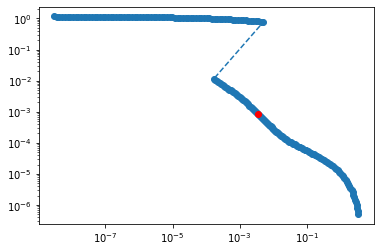

In [12]:
idx = 115
plt.loglog(*fsvals.T, 'o--')
plt.loglog(*fsvals[idx], 'ro')

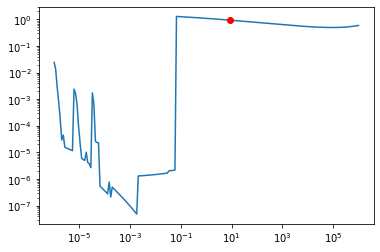

In [13]:
plt.loglog(prange, [s['x'][-2] for s in solutions])
idx= 115
plt.loglog(prange[idx], solutions[idx]['x'][-2], 'ro')

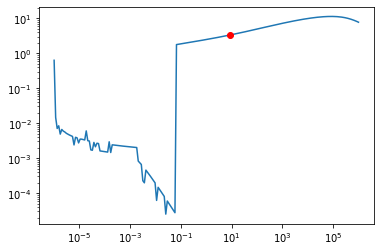

In [14]:
plt.loglog(prange, [s['x'][-1] for s in solutions])
idx= 115
plt.loglog(prange[idx], solutions[idx]['x'][-1], 'ro')

errors 0.00358475 0.000856565
p: (DM(0.94158), DM(3.31793))


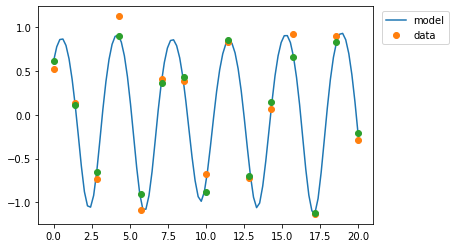

In [15]:
idx = 115
print("errors", f1_ex(solutions[idx]['x']), f2_ex(solutions[idx]['x']))
print("p:", getp(solutions[idx]['x']))
plt.plot(model.observation_times, getx(solutions[idx]['x'])[0], label='model')
plt.plot(neat_ts, data.T, 'o', label='data')
plt.plot(neat_ts, (objective.collocation_matrices@np.array(getx(solutions[idx]['x'])[0]).flatten()).T, 'o')
plt.legend(loc="best", bbox_to_anchor=(1.01, 1))

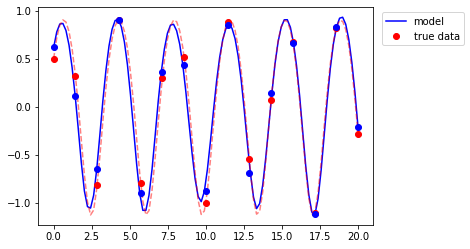

In [16]:
idx = 115
plt.plot(model.observation_times, getx(solutions[idx]['x'])[0], 'b', label='model')
plt.plot(model.observation_times, sol.sol(model.observation_times)[0], 'r--', alpha=0.5)
plt.plot(neat_ts, sol.sol(neat_ts)[0].T, 'ro', label='true data')
plt.plot(neat_ts, (objective.collocation_matrices@np.array(getx(solutions[idx]['x'])[0]).flatten()).T, 'bo')
plt.legend(loc="best", bbox_to_anchor=(1.01, 1))

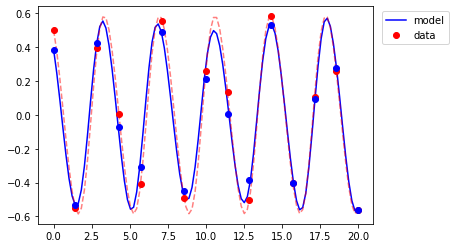

In [17]:
idx = 115
plt.plot(model.observation_times, getx(solutions[idx]['x'])[1], 'b-', label='model')
plt.plot(model.observation_times, sol.sol(model.observation_times)[1], 'r--', alpha=0.5)
plt.plot(neat_ts, sol.sol(neat_ts)[1].T, 'ro', label='data')
plt.plot(neat_ts, (objective.collocation_matrices@np.array(getx(solutions[idx]['x'])[1]).flatten()).T, 'bo')
plt.legend(loc="best", bbox_to_anchor=(1.01, 1))

Text(0, 0.5, '$|| y-c\\Phi ||$')

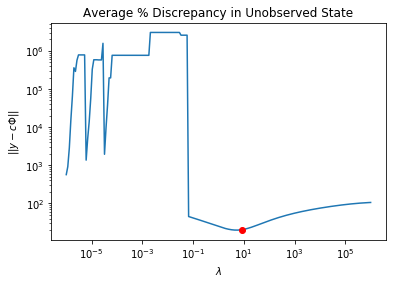

In [18]:
cvfn = lambda idx : np.sqrt(np.sum(((np.array(getx(solutions[idx]['x'])[1]).flatten()) - sol.sol(model.observation_times)[1])**2)/len(model.observation_times))
validation = [100*cvfn(i)/np.mean(np.abs(sol.sol(model.observation_times)[1])) for i in range(200)]
idx = 115
plt.loglog(prange, validation)
plt.loglog(prange[idx], validation[idx], 'ro')
plt.title("Average % Discrepancy in Unobserved State")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$|| y-c\Phi ||$")

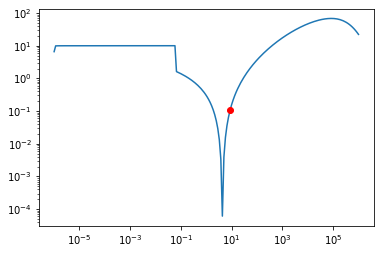

In [19]:
pwrongness = lambda idx: np.sum((np.array(p_true) - np.array(getp(solutions[idx]['x'])))**2)
perr = [pwrongness(i) for i in range(200)]
plt.loglog(prange, perr)
idx = 115
plt.loglog(prange[idx], perr[idx], 'ro')